In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Dataset: beer_foam.csv

Source: J.J. Hackbarth (2006). "Multivariate Analyses of Beer Foam Stand,"
Journal of the Institute of Brewing, Vol. 112, #1, pp. 17-24

Description: Measurements of wet foam height and beer height at various
time points for Shiner Bock at 20C. Author fits exponential decay model:
H(t) = H(0)*exp(-lambda*t)

Variables/Columns
TIME: Time from pour (seconds)  4-8
FOAM: Wet foam height (cm)  10-16
BEER: Beer height (cm)    18-24

**Hypothesis**: Can we predict the time from pour using the measurements of foam height and beer height?


In [2]:
# Read the csv file into a pandas DataFrame

foam = pd.read_csv('clean4ML2.csv')
foam.head()

,algo,titanic,space,flights,housing,quakes,cancer,stocks,useful
0,1.0,0.982036,1.000000,0.999881,0.854642,0.854642,1.000000,0.205761,1.0
1,2.0,0.744395,0.605505,0.999156,0.756146,0.754153,0.937062,0.086419,0.0
2,3.0,0.982036,1.000000,0.999853,1.000000,0.849285,1.000000,0.205761,1.0
3,4.0,0.802691,0.714577,0.999818,1.000000,0.845183,0.972027,0.092592,1.0
4,5.0,0.898204,1.000000,0.999733,1.000000,0.793485,0.969483,0.123456,1.0


In [3]:
# Assign the data to X and y

X = foam[["flights", "cancer"]]
y = foam["algo"].values.reshape(-1, 1)
print(X.shape, y.shape)

(29, 2) (29, 1)


In [4]:
# Use train_test_split to create training and testing data

### BEGIN SOLUTION
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### END SOLUTION

In [5]:
# Create the model using LinearRegression

### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
model = LinearRegression()
### END SOLUTION

In [6]:
# Fit the model to the training data and calculate the scores for the training and testing data

### BEGIN SOLUTION
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

### END SOLUTION 

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.04781397545988464
Testing Score: -0.018116558283631345


Text(0.5,1,'Residual Plot')

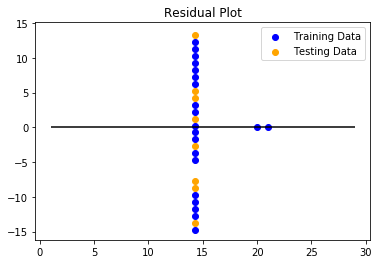

In [7]:
# Plot the Residuals for the Training and Testing data

### BEGIN SOLUTION
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")
### END SOLUTION